In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
# 处理一些冲突
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 设置字体
plt.rcParams["axes.unicode_minus"] = False  # 该语句解决图像中的“-”负号的乱码问题

In [3]:
# 数据读取
humidity = pd.read_excel('./dataset/3-humidity.xls')  # 湿度数据 附件3
evaporation = pd.read_excel('./dataset/4-evaporation.xls')  # 水蒸发 附件4

for _, _, files in os.walk('./dataset/8-climate'):
    climate = []
    for file in files:
        tmp = pd.read_excel('./dataset/8-climate/' + file)
        climate.append(tmp)
        
climate = pd.concat(climate)  # 气候条件 附件8

In [4]:
humidity.head()

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
0,1,2022,115.375,44.125,12.45,52.14,93.45,164.48
1,2,2022,115.375,44.125,12.10,52.14,93.45,164.48
2,3,2022,115.375,44.125,14.96,52.13,93.44,164.48
3,1,2021,115.375,44.125,15.17,50.40,82.44,165.92
4,2,2021,115.375,44.125,13.93,50.40,82.44,165.92


In [5]:
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   月份              123 non-null    int64  
 1   年份              123 non-null    int64  
 2   经度(lon)         123 non-null    float64
 3   纬度(lat)         123 non-null    float64
 4   10cm湿度(kg/m2)   123 non-null    float64
 5   40cm湿度(kg/m2)   123 non-null    float64
 6   100cm湿度(kg/m2)  123 non-null    float64
 7   200cm湿度(kg/m2)  123 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 7.8 KB


In [6]:
humidity.describe()

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
count,123.000000,123.000000,123.000,123.000,123.000000,123.000000,123.000000,123.000000
mean,6.390244,2016.634146,115.375,44.125,14.567724,42.383089,55.351057,167.218618
std,3.496214,2.973292,0.000,0.000,2.849445,7.476833,14.536285,0.976774
min,1.000000,2012.000000,115.375,44.125,9.640000,29.710000,42.360000,164.480000
25%,3.000000,2014.000000,115.375,44.125,12.460000,35.225000,44.695000,166.785000
50%,6.000000,2017.000000,115.375,44.125,14.240000,42.710000,48.390000,167.370000
75%,9.000000,2019.000000,115.375,44.125,16.645000,46.760000,60.860000,167.855000
max,12.000000,2022.000000,115.375,44.125,22.100000,61.700000,93.450000,168.560000


In [7]:
evaporation.head()

,月份,年份,经度(lon),纬度(lat),土壤蒸发量(W/m2),土壤蒸发量(mm)
0,1,2022,115.375,44.125,0.41,0.44
1,2,2022,115.375,44.125,0.28,0.27
2,3,2022,115.375,44.125,5.58,5.98
3,1,2021,115.375,44.125,1.05,1.13
4,2,2021,115.375,44.125,1.58,1.53


In [8]:
evaporation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   月份           123 non-null    int64  
 1   年份           123 non-null    int64  
 2   经度(lon)      123 non-null    float64
 3   纬度(lat)      123 non-null    float64
 4   土壤蒸发量(W/m2)  123 non-null    float64
 5   土壤蒸发量(mm)    123 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 5.9 KB


In [9]:
evaporation.describe()

,月份,年份,经度(lon),纬度(lat),土壤蒸发量(W/m2),土壤蒸发量(mm)
count,123.000000,123.000000,123.000,123.000,123.000000,123.000000
mean,6.390244,2016.634146,115.375,44.125,9.340244,9.872276
std,3.496214,2.973292,0.000,0.000,9.214743,9.748591
min,1.000000,2012.000000,115.375,44.125,0.280000,0.270000
25%,3.000000,2014.000000,115.375,44.125,1.170000,1.255000
50%,6.000000,2017.000000,115.375,44.125,6.430000,6.850000
75%,9.000000,2019.000000,115.375,44.125,14.820000,15.880000
max,12.000000,2022.000000,115.375,44.125,37.170000,39.260000


In [10]:
climate.head()

,站点号,海拔高度(m),经度,纬度,年份,月份,平均气温(℃),平均最高气温(℃),平均最低气温(℃),最高气温极值(℃),...,平均站点气压(hPa),积雪深度(mm),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots),平均最大瞬时风速(knots),最大瞬时风速极值(knots)
0,54102099999,1004.0,115.375,44.125,2012,1,-22.94,-16.04,-29.35,-9.28,...,907.04,NaN,29.00,26.23,29.93,5.52,8.96,15.5,NaN,NaN
1,54102099999,1004.0,115.375,44.125,2012,2,-17.86,-10.76,-26.25,-0.72,...,903.99,NaN,29.32,26.23,29.93,6.01,11.12,15.5,NaN,NaN
2,54102099999,1004.0,115.375,44.125,2012,3,-7.11,-1.32,-14.78,15.39,...,902.44,NaN,28.28,15.61,29.93,7.36,12.60,27.2,NaN,NaN
3,54102099999,1004.0,115.375,44.125,2012,4,6.94,13.94,-1.94,26.22,...,898.30,NaN,28.21,14.81,29.93,8.82,15.09,25.3,NaN,NaN
4,54102099999,1004.0,115.375,44.125,2012,5,14.61,22.14,4.93,32.50,...,899.50,NaN,28.55,21.57,29.93,8.56,15.54,25.3,NaN,NaN


In [11]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 6
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   站点号              127 non-null    int64  
 1   海拔高度(m)          127 non-null    float64
 2   经度               127 non-null    float64
 3   纬度               127 non-null    float64
 4   年份               127 non-null    int64  
 5   月份               127 non-null    int64  
 6   平均气温(℃)          127 non-null    float64
 7   平均最高气温(℃)        127 non-null    float64
 8   平均最低气温(℃)        127 non-null    float64
 9   最高气温极值(℃)        127 non-null    float64
 10  最低气温极值(℃)        127 non-null    float64
 11  平均气温≥18℃的天数      127 non-null    int64  
 12  平均气温≥35℃的天数      127 non-null    int64  
 13  平均气温≤0℃的天数       127 non-null    int64  
 14  平均露点温度(℃)        127 non-null    float64
 15  降水量(mm)          127 non-null    float64
 16  最大单日降水量(mm)      127 non-null    float64
 17  降水天数             1

In [12]:
climate.describe()

,站点号,海拔高度(m),经度,纬度,年份,月份,平均气温(℃),平均最高气温(℃),平均最低气温(℃),最高气温极值(℃),...,平均站点气压(hPa),积雪深度(mm),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots),平均最大瞬时风速(knots),最大瞬时风速极值(knots)
count,1.270000e+02,127.0,127.000,127.000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,...,127.000000,33.000000,127.000000,127.000000,127.00000,127.000000,127.000000,127.000000,30.000000,30.000000
mean,5.410210e+10,1004.0,115.375,44.125,2016.803150,6.362205,3.774252,10.362756,-3.996850,20.494646,...,900.863150,65.670606,24.804724,14.171102,29.53189,6.390315,11.044016,19.306299,21.446667,34.493333
std,0.000000e+00,0.0,0.000,0.000,3.073283,3.449567,14.264417,14.389743,14.133904,13.302740,...,4.964158,57.912945,3.275712,5.430255,0.97713,1.014679,1.790277,3.224232,3.592665,6.981845
min,5.410210e+10,1004.0,115.375,44.125,2012.000000,1.000000,-23.330000,-18.580000,-29.350000,-9.280000,...,891.520000,10.160000,15.840000,3.700000,25.27000,4.370000,7.250000,12.400000,15.470000,22.900000
25%,5.410210e+10,1004.0,115.375,44.125,2014.000000,3.000000,-9.810000,-3.970000,-17.235000,10.110000,...,896.285000,20.320000,22.505000,9.415000,29.93000,5.650000,9.735000,17.500000,18.877500,31.150000
50%,5.410210e+10,1004.0,115.375,44.125,2017.000000,6.000000,5.820000,12.900000,-2.660000,25.000000,...,901.910000,40.640000,25.110000,14.160000,29.93000,6.170000,10.790000,19.400000,20.740000,32.700000
75%,5.410210e+10,1004.0,115.375,44.125,2019.000000,9.000000,17.120000,23.195000,9.005000,31.780000,...,905.055000,110.490000,27.740000,17.620000,29.93000,6.915000,12.080000,21.400000,23.317500,40.550000
max,5.410210e+10,1004.0,115.375,44.125,2022.000000,12.000000,25.000000,32.030000,18.700000,39.390000,...,911.730000,200.660000,29.400000,26.230000,29.93000,9.670000,15.540000,27.200000,28.160000,47.000000


In [13]:
humidity = humidity.rename(columns={
    '经度(lon)': '经度',
    '纬度(lat)': '纬度'
})

evaporation = evaporation.rename(columns={
    '经度(lon)': '经度',
    '纬度(lat)': '纬度'
})
all_df = None 
all_df = climate.merge(evaporation, on=['年份', '月份', '经度', '纬度'], how='left')
all_df = all_df.merge(humidity, on=['年份', '月份', '经度', '纬度'], how='left')
all_df = all_df[~all_df['10cm湿度(kg/m2)'].isnull()]  # 去掉没有湿度的行

In [14]:
all_df.head()

,站点号,海拔高度(m),经度,纬度,年份,月份,平均气温(℃),平均最高气温(℃),平均最低气温(℃),最高气温极值(℃),...,平均最大持续风速(knots),单日最大平均风速(knots),平均最大瞬时风速(knots),最大瞬时风速极值(knots),土壤蒸发量(W/m2),土壤蒸发量(mm),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
0,54102099999,1004.0,115.375,44.125,2012,1,-22.94,-16.04,-29.35,-9.28,...,8.96,15.5,NaN,NaN,0.57,0.61,13.73,30.87,42.79,168.56
1,54102099999,1004.0,115.375,44.125,2012,2,-17.86,-10.76,-26.25,-0.72,...,11.12,15.5,NaN,NaN,0.86,0.86,13.00,30.87,42.79,168.56
2,54102099999,1004.0,115.375,44.125,2012,3,-7.11,-1.32,-14.78,15.39,...,12.60,27.2,NaN,NaN,1.78,1.91,12.60,30.87,42.79,168.56
3,54102099999,1004.0,115.375,44.125,2012,4,6.94,13.94,-1.94,26.22,...,15.09,25.3,NaN,NaN,6.94,7.20,11.97,30.73,42.76,168.56
4,54102099999,1004.0,115.375,44.125,2012,5,14.61,22.14,4.93,32.50,...,15.54,25.3,NaN,NaN,16.89,18.10,14.18,29.99,42.58,168.56


In [15]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   站点号              123 non-null    int64  
 1   海拔高度(m)          123 non-null    float64
 2   经度               123 non-null    float64
 3   纬度               123 non-null    float64
 4   年份               123 non-null    int64  
 5   月份               123 non-null    int64  
 6   平均气温(℃)          123 non-null    float64
 7   平均最高气温(℃)        123 non-null    float64
 8   平均最低气温(℃)        123 non-null    float64
 9   最高气温极值(℃)        123 non-null    float64
 10  最低气温极值(℃)        123 non-null    float64
 11  平均气温≥18℃的天数      123 non-null    int64  
 12  平均气温≥35℃的天数      123 non-null    int64  
 13  平均气温≤0℃的天数       123 non-null    int64  
 14  平均露点温度(℃)        123 non-null    float64
 15  降水量(mm)          123 non-null    float64
 16  最大单日降水量(mm)      123 non-null    float64
 17  降水天数            

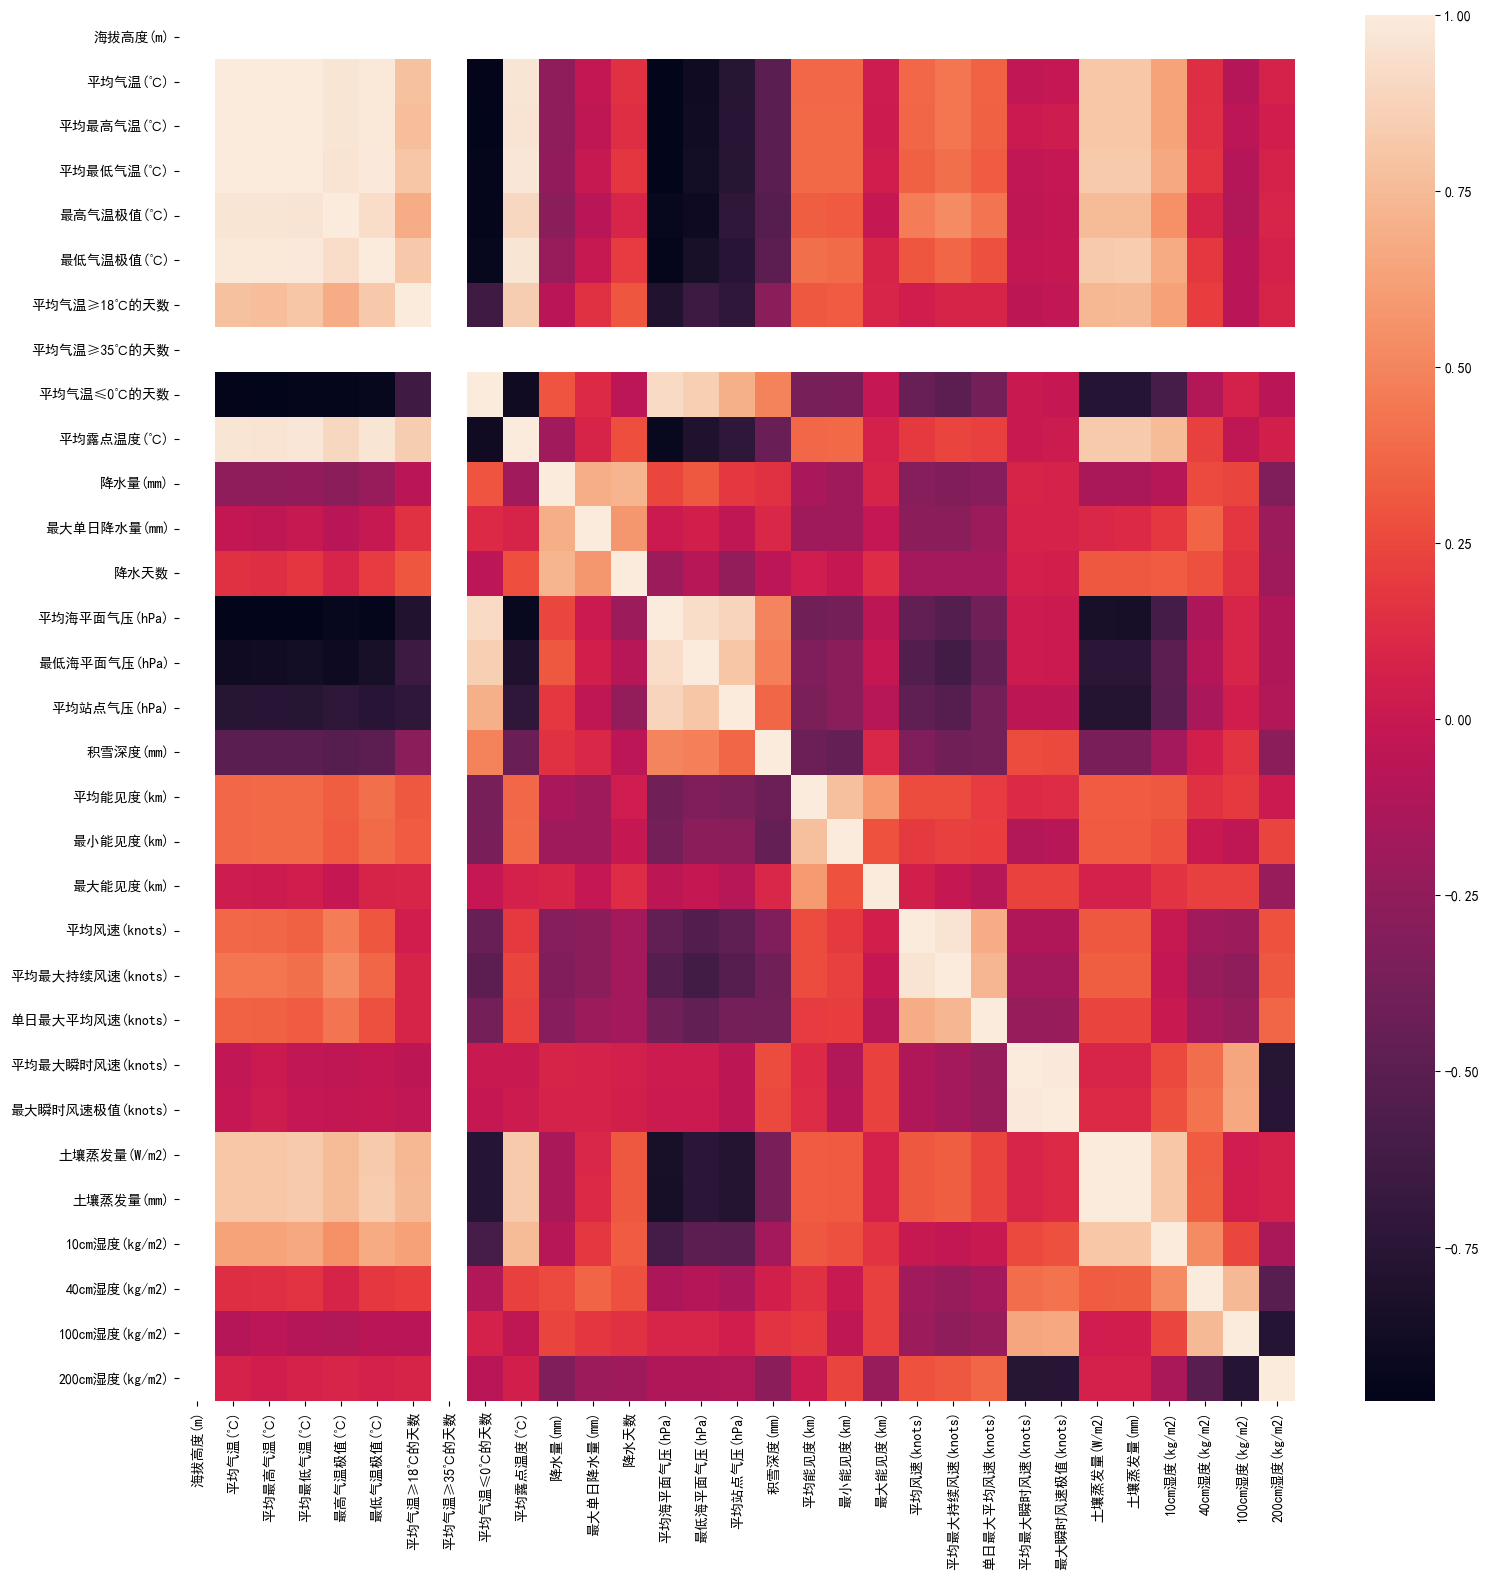

In [20]:
plt.figure(figsize=(18,18))
corr = all_df.fillna(0).drop(['站点号','年份', '月份', '经度', '纬度'], axis=1).corr() #使用皮尔逊系数了解各个因素之间的相关关系

sns.heatmap(corr)
plt.savefig('./PRScor.png')

## 决策回归树

In [92]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz 

os.environ['PATH']
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

x_cols = ['年份', '月份', '海拔高度(m)','平均气温(℃)', '平均最高气温(℃)', '平均最低气温(℃)', '最高气温极值(℃)', '最低气温极值(℃)', '平均气温≥18℃的天数', 
       '平均气温≥35℃的天数', '平均气温≤0℃的天数', '平均露点温度(℃)', '降水量(mm)', '最大单日降水量(mm)', '降水天数', 
        '平均海平面气压(hPa)', '最低海平面气压(hPa)', '平均站点气压(hPa)', '积雪深度(mm)', '最小能见度(km)', '最大能见度(km)',
       '平均风速(knots)', '平均最大持续风速(knots)', '单日最大平均风速(knots)', '平均最大瞬时风速(knots)', '最大瞬时风速极值(knots)',
       '土壤蒸发量(W/m2)', '土壤蒸发量(mm)']

X = all_df[x_cols].fillna(0)
"""
y1 = all_df['10cm湿度(kg/m2)']
y2 = all_df['40cm湿度(kg/m2)']
y3 = all_df['100cm湿度(kg/m2)']
y4 = all_df['200cm湿度(kg/m2)']
"""
y_cols = ['10cm湿度(kg/m2)', '40cm湿度(kg/m2)', '100cm湿度(kg/m2)', '200cm湿度(kg/m2)']
y = all_df[y_cols]

clf = tree.DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file='tree.dot',
                      feature_names=x_cols,  
                      class_names=y_cols,  
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data, encoding='utf-8', format='png') 

In [93]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

trees = tree.DecisionTreeRegressor()

r2_scores = cross_val_score(trees, X, y, cv=3, scoring='r2')

r2_scores

array([-1.56966641, -6.98639123, -1.23164512])

In [94]:
max_error_scores = cross_val_score(trees, X, y, cv=3, scoring='neg_mean_squared_error')

max_error_scores

array([ -31.80989939,  -62.49833537, -245.79181585])

In [95]:
from sklearn.feature_selection import SelectFromModel
from sklearn import tree

selector = SelectFromModel(estimator=tree.DecisionTreeRegressor()).fit(X, y)
# print("模型参数权重：", selector.estimator_.coef_)
# 特征选择阈值默认为权重参数绝对值的均值
# print("特征选择阈值：", selector.threshold_, np.mean(np.abs(selector.estimator_.coef_)))
print("特征选择标记：", selector.get_support())
X_transformed = selector.transform(X)
X_transformed.shape

特征选择标记： [ True False False False False False False False False False False False
 False False False False False False  True False False False False False
 False  True False False]


(123, 3)

In [96]:
# ['年份',  '积雪深度(mm)', '最大瞬时风速极值(knots)', '土壤蒸发量(mm)']

# x_cols = ['年份', '月份','平均气温(℃)', '平均最高气温(℃)', '平均最低气温(℃)', '最高气温极值(℃)', '最低气温极值(℃)', '平均气温≥18℃的天数', 
#        '平均气温≥35℃的天数', '平均气温≤0℃的天数', '平均露点温度(℃)', '降水量(mm)', '最大单日降水量(mm)', '降水天数', 
#         '平均海平面气压(hPa)', '最低海平面气压(hPa)', '平均站点气压(hPa)', '积雪深度(mm)', '最小能见度(km)', '最大能见度(km)',
#        '平均风速(knots)', '平均最大持续风速(knots)', '单日最大平均风速(knots)', '平均最大瞬时风速(knots)', '最大瞬时风速极值(knots)',
#        '土壤蒸发量(W/m2)', '土壤蒸发量(mm)']

X = all_df[x_cols].dropna(axis='columns')
X['温度差值'] = X['平均最高气温(℃)'] - X['平均最低气温(℃)']
X['极值温度差值'] = X['最高气温极值(℃)'] - X['最低气温极值(℃)']
X['能见度差值'] = X['最小能见度(km)'] - X['最大能见度(km)']
X['海拔温度'] = X['海拔高度(m)'] / X['平均气温(℃)']

print(X.info())

from sklearn.feature_selection import SelectFromModel
from sklearn import tree

selector = SelectFromModel(estimator=tree.DecisionTreeRegressor()).fit(X, y)
# print("模型参数权重：", selector.estimator_.coef_)
# 特征选择阈值默认为权重参数绝对值的均值
# print("特征选择阈值：", selector.threshold_, np.mean(np.abs(selector.estimator_.coef_)))
print("特征选择标记：", selector.get_support())
X_transformed = selector.transform(X)
X_transformed.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   年份               123 non-null    int64  
 1   月份               123 non-null    int64  
 2   海拔高度(m)          123 non-null    float64
 3   平均气温(℃)          123 non-null    float64
 4   平均最高气温(℃)        123 non-null    float64
 5   平均最低气温(℃)        123 non-null    float64
 6   最高气温极值(℃)        123 non-null    float64
 7   最低气温极值(℃)        123 non-null    float64
 8   平均气温≥18℃的天数      123 non-null    int64  
 9   平均气温≥35℃的天数      123 non-null    int64  
 10  平均气温≤0℃的天数       123 non-null    int64  
 11  平均露点温度(℃)        123 non-null    float64
 12  降水量(mm)          123 non-null    float64
 13  最大单日降水量(mm)      123 non-null    float64
 14  降水天数             123 non-null    int64  
 15  平均海平面气压(hPa)     123 non-null    float64
 16  最低海平面气压(hPa)     123 non-null    float64
 17  平均站点气压(hPa)     

(123, 5)

In [97]:
['年份', '平均风速(knots)', '平均最大持续风速(knots)', '土壤蒸发量(mm)','极值温度差值']

['年份', '平均风速(knots)', '平均最大持续风速(knots)', '土壤蒸发量(mm)', '极值温度差值']

可以看到主要和以上这些变量有关，画图看看这些变量与时间的关系

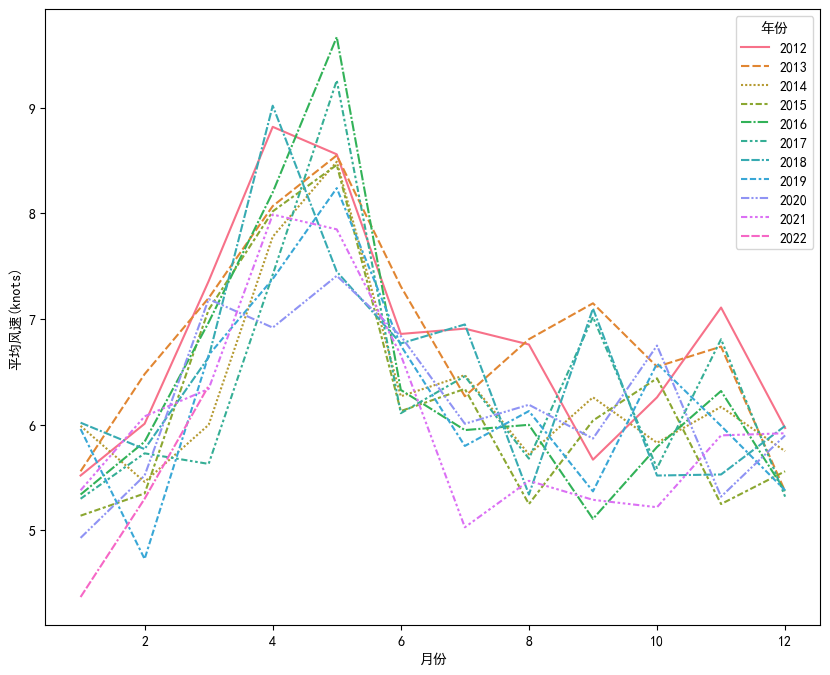

In [98]:
plt.figure(figsize=(10,8))

table = pd.pivot_table(X, values='平均风速(knots)', index=['月份'], columns=['年份'])

sns.lineplot(data=table)
plt.ylabel('平均风速(knots)')
plt.savefig('./平均风速.png')

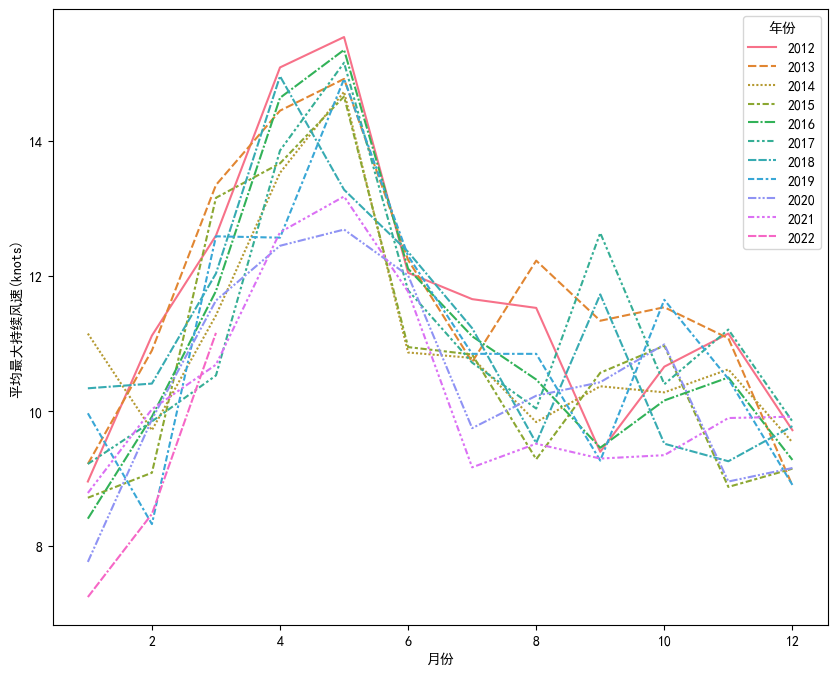

In [99]:
plt.figure(figsize=(10,8))

table = pd.pivot_table(X, values='平均最大持续风速(knots)', index=['月份'], columns=['年份'])

sns.lineplot(data=table)
plt.ylabel('平均最大持续风速(knots)')
plt.savefig('./平均最大持续风速.png')

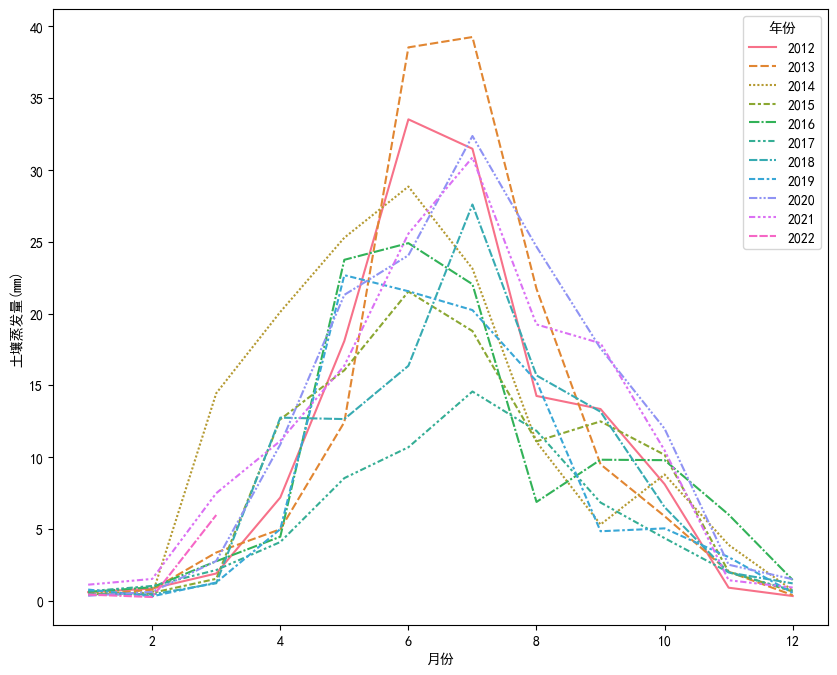

In [100]:
plt.figure(figsize=(10,8))

table = pd.pivot_table(X, values='土壤蒸发量(mm)', index=['月份'], columns=['年份'])

sns.lineplot(data=table)
plt.ylabel('土壤蒸发量(mm)')
plt.savefig('./土壤蒸发量.png')

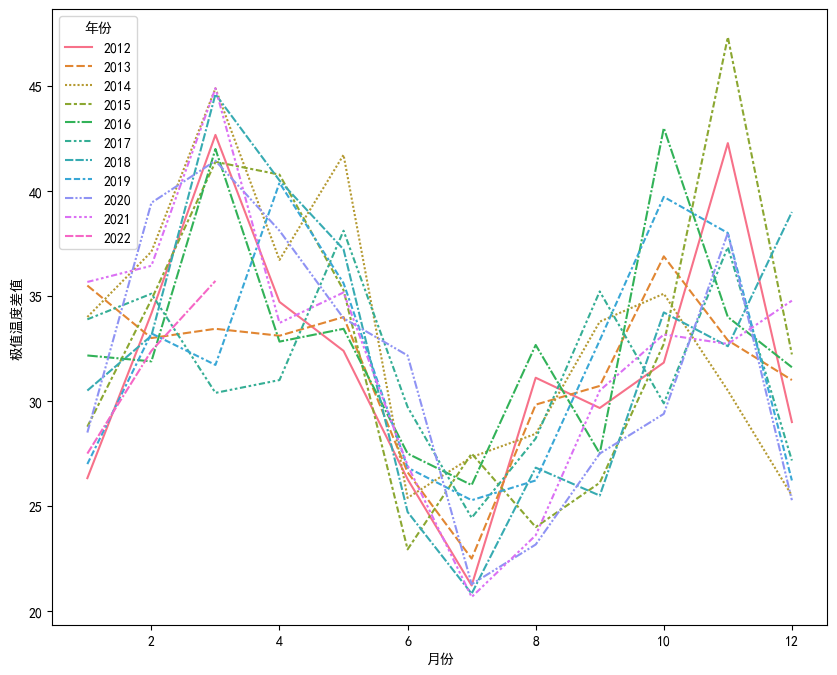

In [101]:
plt.figure(figsize=(10,8))

table = pd.pivot_table(X, values='极值温度差值', index=['月份'], columns=['年份'])

sns.lineplot(data=table)
plt.ylabel('极值温度差值')
plt.savefig('./极值温度差值.png')

四个特征整体都走势相似，变化不是十分剧烈，我们对其使用平均值作为2022年以及2023的特征进行预测

In [102]:
tmp = X.groupby(['年份', '月份']).sum().reset_index()

tmp1 = tmp[tmp['年份']<2021] # 用于预测2022

tmp1 = tmp1.groupby(['月份']).sum().reset_index()
tmp1['年份'] = 2022

tmp2 = tmp[tmp['年份']>2012] # 用于预测2023
tmp2 = tmp2.groupby(['月份']).sum().reset_index()
tmp2['年份'] = 2023

In [103]:
from sklearn import tree

x_cols = ['年份', '平均风速(knots)', '平均最大持续风速(knots)', '土壤蒸发量(mm)','极值温度差值']
y_cols = y_cols = ['10cm湿度(kg/m2)', '40cm湿度(kg/m2)', '100cm湿度(kg/m2)', '200cm湿度(kg/m2)']

X = X[x_cols]  #是这里的问题，会覆盖原来的X，在跳到上面运行 就会有问题

clf = clf.fit(X, y)

In [104]:
clf.predict(tmp1[x_cols])

array([[ 14.77,  47.77,  79.86, 165.91],
       [ 14.77,  47.77,  79.86, 165.91],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 14.77,  47.77,  79.86, 165.91]])

In [105]:
clf.predict(tmp2[x_cols])

array([[ 14.77,  47.77,  79.86, 165.91],
       [ 14.77,  47.77,  79.86, 165.91],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 17.66,  47.63,  76.28, 165.71],
       [ 14.77,  47.77,  79.86, 165.91]])

逻辑：就是先学习判断那些特征和湿度有关，然后在画图看看这些特征变化大不大，不大就用均值作为放到特征预测,做一个简单的shift（也即：2012-2021预测2022，2012-2022预测2023），可以再加一个方差值来

选用决策树，因为它具有可解释性，有利于模型解释，来探究哪些特征对模型贡献的作用